In [1]:
from sklearn import datasets
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_mldata
from scipy import sparse
from sklearn.datasets.samples_generator import make_blobs


import numpy as np
import sys
import csv
import random#FASHION 
import pickle


In [2]:
#kmeans
import random
from sklearn.metrics.pairwise import cosine_similarity
from operator import add
from scipy import sparse
def kmeans(data,k) :
    
    n = len(data)
    m = len(data[0])
    print "data has total ",n," data points"
    start_points = random.sample(range(n),k)
    print "the initial points are : ",start_points
    centers = [data[start_points[i]] for i in range(k)]
    
    old_groups = [[]for i in range(k)]
    group_members = [[] for i in range(k)]
    new_centers = [[0 for j in range(m)]for i in range(k)]
    iteration = 0
    while(True):
        
        similarity_matrix = cosine_similarity(data,centers)
        
        
        print "Iteration ",iteration
        iteration += 1
        
        for i in range(n) :
            max_similarity = 0
            group = 0
#             for j in range(k):
#                 similarity = similarity_matrix[i][j]
#                 if max_similarity < similarity:
#                     max_similarity = similarity
#                     group = j
            group = np.argmax(similarity_matrix[i])
            #assign i to group member 
            group_members[group].append(i)
            try:
                new_centers[group] = map(add, new_centers[group], data[i])
            except:
                print data[i],new_centers[group]
                return []
        
        #averaging the groups
        for j in range(k):
            new_centers[j] = [(new_centers[j][i]/len(group_members[j])) for i in range(m)]
        
#         if values of new centers is same as old
        if new_centers == centers :
            return group_members

#         if group_members == old_groups:
#             return group_members

        centers = list(new_centers)
        new_centers = [[0 for j in range(m)]for i in range(k)]
        old_groups = list(group_members)
        group_members = [[] for i in range(k)]
        

In [7]:
from collections import Counter

def purity(groups,k,N):
    labels_minst =  label
#     labels_minst = targets[:N]
#     print groups
    label_group = [[]for i in range(k)]
    for i in range(k):
        for j in range(len(groups[i])):
            label_group[i].append(labels_minst[groups[i][j]])
#     print len(label_group[1])

    ratio = 0
    for i in label_group:
        most_common,num_most_common = Counter(i).most_common(1)[0]
#         print most_common,num_most_common,len(i)
        ratio += num_most_common
#     print ratio,N
    print ratio*1.0/N
    

In [8]:
import collections
def giniIndex(groups,k,N):
    labels_minst = label
    label_group = [[]for i in range(k)]
    for i in range(k):
        for j in range(len(groups[i])):
            label_group[i].append(labels_minst[groups[i][j]])
   
    G = [0 for i in range(len(label_group))]
    z = 0
    for i in label_group:
        s = 0
        c = collections.Counter(i)
#         print c
        for j in c:
            s += pow((c[int(j)]*1.0)/len(i),2)
        G[int(z)] = 1 - s
        z += 1
    #print G
    s = 0
    for i in range(len(G)):
        s += G[i]*len(label_group[i])
    
    return s/N
    

In [ ]:
#FASHION 
data =[]
label = {}
with open("fashion-mnist_test.csv","rb") as f:
    dat = csv.reader(f)
    c = -1
    for row in dat:
        
        if c != -1:
            a = map(float,row)
            data.append(a[1:])
            label[c] = a[0]
        c+=1
    print len(data), len(data[0])

final_group = kmeans(data,10)

10000 784
data has total  10000  data points
the initial points are :  [7757, 7309, 3679, 1029, 8644, 8736, 1665, 5606, 8244, 318]
Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19
Iteration  20
Iteration  21
Iteration  22
Iteration  23
Iteration  24
Iteration  25
Iteration  26
Iteration  27
Iteration  28
Iteration  29
Iteration  30
Iteration  31
Iteration  32
Iteration  33
Iteration  34


In [10]:
#training data
purity(final_group,10,len(data))
print giniIndex(final_group,10,len(data))

0.4561
0.628838831792


In [16]:
#data k = 20
purity(final_group,20,len(data))
print giniIndex(final_group,20,len(data))

0.6615
0.440875973912


In [18]:
#training data
purity(final_group,5,len(data))
print giniIndex(final_group,5,len(data))

0.3728
0.71569516307


In [66]:
#Testing data
purity(final_group,10,len(data))
print giniIndex(final_group,10,len(data))

0.5876
0.515426567022


In [2]:
from sklearn.model_selection import train_test_split
mnist = fetch_mldata('MNIST original')
X_train, X_test, y_train, y_test = train_test_split(mnist.data,mnist.target, test_size=0.15)
labels_minst = {}
# for i in range(len(y_train)):
#     labels_minst[i] = y_train[i]
# mnist_data = [[None for  j in range(len(X_train[0]))] for i in range(len(X_train))] 
# for i in range(len(X_train)):
#     for j in range(len(X_train[0])):
#         mnist_data[i][j] = float(X_train[i][j])
# y_test = y_test[:10000]
# X_test = X_test[:10000]
for i in range(len(y_test)):
    labels_minst[i] = y_test[i]

mnist_data = [[None for  j in range(len(X_test[0]))] for i in range(len(X_test))] 
for i in range(len(X_test)):
    for j in range(len(X_test[0])):
        mnist_data[i][j] = float(X_test[i][j])
        
final_group_mnist = kmeans(mnist_data,10)

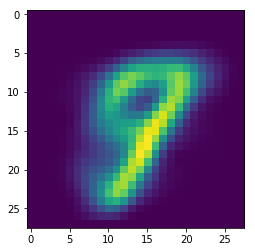

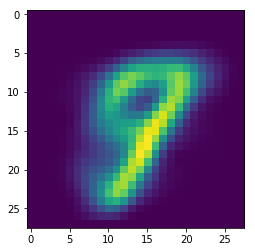

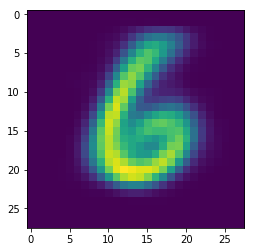

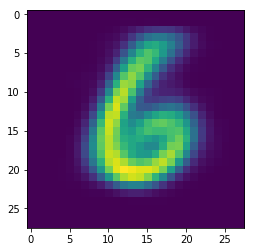

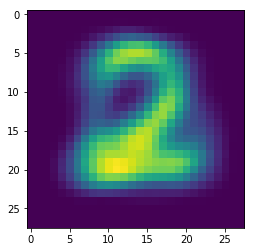

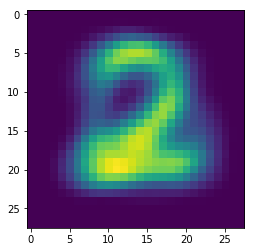

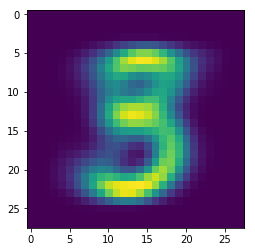

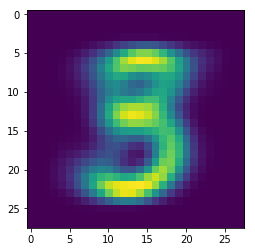

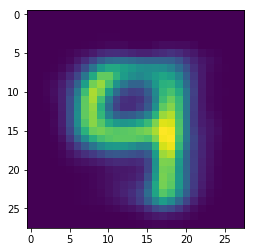

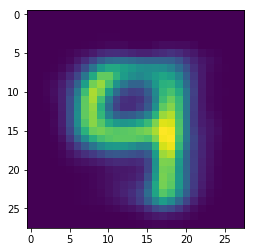

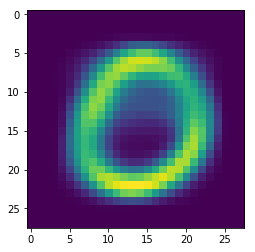

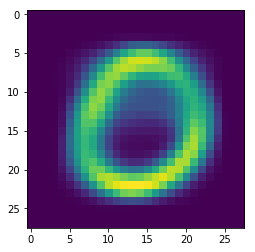

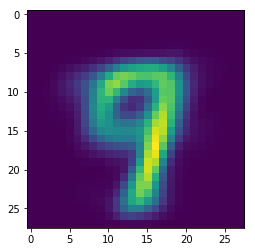

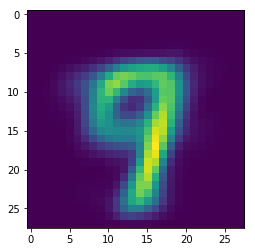

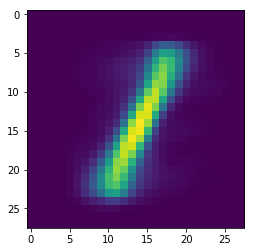

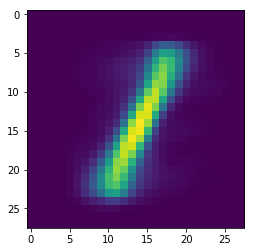

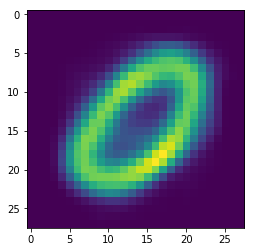

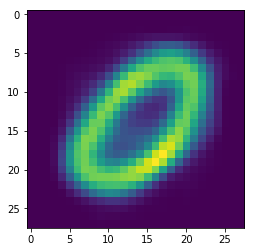

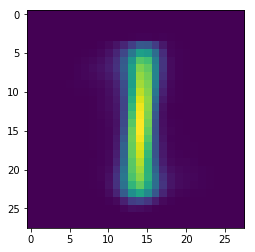

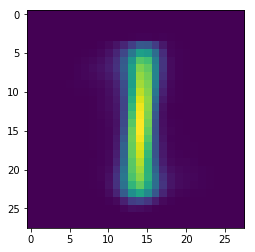

In [68]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(np.reshape(c1[i].todense().tolist()[0],(28,28)))
    plt.show()
    plt.imshow(np.reshape(c2[i],(28,28)))
    plt.show()


In [1]:
#Test Data
# purity(final_group_mnist,10,len(X_test))
# print giniIndex(final_group_mnist,10,len(X_test))

In [10]:
#Data with k =5
purity(final_group_mnist,5,len(X_test))
print giniIndex(final_group_mnist,5,len(X_test))

0.469333333333
0.647391170848


In [12]:
#Data with k = 20
purity(final_group_mnist,20,len(X_test))
print giniIndex(final_group_mnist,20,len(X_test))

0.712666666667
0.39709745993


In [7]:
#Train Data
purity(final_group_mnist,10,len(X_train))
print giniIndex(final_group_mnist,10,len(X_train))

0.600605042017
0.526045338007


In [75]:
#20 NG news group.
newsgroup_train = datasets.fetch_20newsgroups(subset = 'train')
newsgroup_test = datasets.fetch_20newsgroups(subset = 'test')
data = newsgroup_train.data + newsgroup_test.data
targets = list(newsgroup_train.target) + list(newsgroup_test.target)
print data[45]

From: Robert Everett Brunskill <rb6t+@andrew.cmu.edu>
Subject: Re: $$$ to fix TRACKBALL
Organization: Freshman, Electrical and Computer Engineering, Carnegie Mellon, Pittsburgh, PA
Lines: 7
NNTP-Posting-Host: po4.andrew.cmu.edu
In-Reply-To: <93105.152944BR4416A@auvm.american.edu>

Of course, if you want to check the honesty of your dealler, take it in
knowing what's wrong, and ask them to tell you. :)

Of course he'll probably know right a way, then charge you a $20 service
fee. :)

Rob



In [115]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# stop_words = set(stopwords.words('english'))

# for i in range(len(data)):
#     if i %100 == 0:
#         print i
#     data[i] = word_tokenize(data[i])
#     data[i] = [w for w in data[i] if (not w in stop_words) and w.isalnum()]

In [94]:
data[3]

u'From jgreen amber Joe Green Subject Re Weitek P9000 Organization Harris Computer Systems Division Lines 14 Distribution world TIN version PL9 Robert Kyanko rob wrote abraxis writes article Anyone know Weitek P9000 graphics chip As far stuff goes looks pretty nice It got quadrilateral fill command requires four points Do Weitek number I like get information chip Joe Green Harris Corporation jgreen Computer Systems Division The thing really scares person sense humor Jonathan Winters'

In [71]:
from nltk.corpus import words

In [73]:
"hel" in words.words()

False

In [90]:
for i in range(len(data)):
    data[i] = " ".join(data[i])

In [95]:
import pickle
pickle.dump( data, open( "save.p", "wb" ) )

In [78]:
import pickle
data = pickle.load(open( "save.p", "rb" ))
print data[45]
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data[:10000])

From Robert Everett Brunskill Subject Re fix TRACKBALL Organization Freshman Electrical Computer Engineering Carnegie Mellon Pittsburgh PA Lines 7 Of course want check honesty dealler take knowing wrong ask tell Of course probably know right way charge 20 service fee Rob


In [17]:
# v = vectors.todense()#.tolist()[0]
# v = [v[i].tolist()[0] for i in range(len(v))]
# len(v[0])
# ng = kmeans(v,20)
# v = 0

In [44]:
# # vectors[0].todense().tolist()[0]
# start_points = random.sample(range(5000),200)

# a = vectors.getrow(start_points[0])
# for i in range(1,len(start_points)):
#     a += vectors[start_points[i]]
# b = a
# # a = a/len(start_points)
# print np.vstack([a.todense(),b.todense()])

[[ 0.69119076  0.48130557  0.         ...,  0.          0.          0.        ]
 [ 0.69119076  0.48130557  0.         ...,  0.          0.          0.        ]]


In [81]:
print "The purity for 20 ng is :",purity(fin_group,20,10000)
# targets[:1000]
# print fin_group

The purity for 20 ng is : 0.522
None


In [79]:
fin_group = kmeans_20NG([],vectors,20)
# print fin_group

data has total  10000  data points
the initial points are :  [3097, 4455, 1188, 8465, 1697, 597, 6845, 1021, 9490, 942, 7453, 4651, 3381, 9183, 75, 8875, 9432, 8753, 452, 2957]
Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19
Iteration  20
Iteration  21
Iteration  22
Iteration  23
Iteration  24
Iteration  25
Iteration  26
Iteration  27
Iteration  28
Iteration  29
Iteration  30
Iteration  31
Iteration  32
Iteration  33
Iteration  34
Iteration  35
Iteration  36


In [70]:
#kmeans
import random
from sklearn.metrics.pairwise import cosine_similarity
from operator import add
from scipy import sparse
c1 =0
c2 =0
def kmeans_20NG(dense_data,data,k) :
#     data = vectors
    n = data.shape[0]
    m = data.shape[1]
    
    
    print "data has total ",n," data points"
    start_points = random.sample(range(n),k)
    centers = []
    print "the initial points are : ",start_points
    
#     centers = np.asarray([data[start_points[i]].todense().tolist()[0] for i in range(k)])
    for i in range(k):
        if i ==0:
            centers = data[start_points[i]].todense()
        else:
            centers = np.row_stack((centers,data[start_points[i]].todense()))
    centers = sparse.csc_matrix(centers)

    #     print centers[2]
    old_groups = [[]for i in range(k)]
    group_members = [[] for i in range(k)]
#     new_centers = sparse.csr_matrix([[0 for j in range(m)]for i in range(k)])
    iteration = 0
    
    while(True):
        
#         print data[0], centers
#         print data.shape, centers.shape
        
#         print centers,dense_centers

        similarity_matrix = cosine_similarity(data,centers)
        print "Iteration ",iteration
        iteration += 1
        
        for i in range(n) :
            max_similarity = 0
            group = 0
            for j in range(k):
                similarity = similarity_matrix[i][j]
                if max_similarity < similarity:
                    max_similarity = similarity
                    group = j
                    
            #assign i to group member 
            group_members[group].append(i)
            
#         for j in range(len(group_members)):
#             if not group_members[j]:
#                 group_members[j].append(random.sample(range(n),1))
            
        for j in range(len(group_members)):
            g_m = group_members[j]
            
            stack = data.getrow(g_m[0])
            for v in range(1,len(g_m)) :
                stack = stack + data[g_m[v]]
            stack = stack / len(g_m)
            if j == 0:
                new_centers = stack.todense()
            else:
                new_centers = np.row_stack((new_centers,stack.todense()))
        
        #if values of new centers is same as old
        if group_members == old_groups : #or iteration == 30:
            return group_members
        centers = sparse.csr_matrix(new_centers)
#         print centers.shape
        new_centers = [[0 for j in range(m)]for i in range(k)]
        old_groups = list(group_members)
        group_members = [[] for i in range(k)]
        

#         dense_similarity_matrix = cosine_similarity(dense_data,dense_centers)


#         print "Iteration ",dense_iteration
#         dense_iteration += 1

#         for i in range(dense_n) :
#             dense_max_similarity = 0
#             dense_group = 0
#             for j in range(k):
#                 dense_similarity = dense_similarity_matrix[i][j]
#                 if dense_max_similarity < dense_similarity:
#                     dense_max_similarity = dense_similarity
#                     dense_group = j
#             #assign i to group member 
#             dense_group_members[dense_group].append(i)
#             try:
#                 dense_new_centers[dense_group] = map(add, dense_new_centers[dense_group], dense_data[i])
#             except:
#                 print dense_data[i],dense_new_centers[dense_group]
#                 return []

#         #averaging the groups
#         for j in range(k):
#             dense_new_centers[j] = [(dense_new_centers[j][i]/len(dense_group_members[j])) for i in range(dense_m)]

# #         if values of new centers is same as old
#         if dense_new_centers == dense_centers :
#             return dense_group_members

# #         if group_members == old_groups:
# #             return group_members

#         dense_centers = list(dense_new_centers)
#         dense_new_centers = [[0 for j in range(dense_m)]for i in range(k)]
#         dense_old_groups = list(dense_group_members)
#         dense_group_members = [[] for i in range(k)]
#         if iteration ==5:
#             c1 = centers
#             c2 = dense_centers
#     #     print centers[0], dense_centers[0]
#     #     print centers[9], dense_centers[9]
#             return c1,c2
    

TypeError: 'int' object has no attribute '__getitem__'